# Lab 3: Scikit Learn and Regression

Deadline Wednesday 11/10/21  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. In this lab and lab 4 we will work with different models provided by **scikit-learn** package and build several models.

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    


### Linear Regression

Let's start with a simple linear regression. First we will see an example of a simple linear regression. A simple straight line that fits the data. The formula representing the model is $$y = \beta_1 x +  \beta_0$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

Let's start by using the following simple data for showing how linear regression works in scikit-learn. Then it will be your turn to build a regression model on a dataset

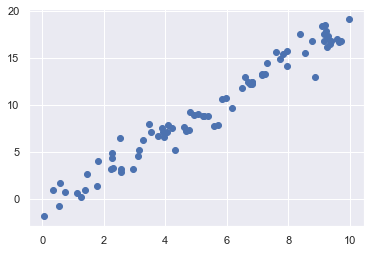

In [2]:
rng = np.random.RandomState(50)

x = 10 * rng.rand(80)
y = 2 * x - 1 + rng.randn(80)

plt.scatter(x,y)

After processing your data, the first step is to choose a model. For the dataset above, we are going to pick "Linear Regression" model. Simply import your model:

In [3]:
from sklearn.linear_model import LinearRegression

Next, pick the model hyperparameters

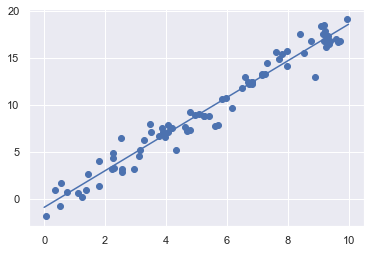

In [4]:

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

We can check the model settings: 

In [5]:
print(model.coef_[0])
print(model.intercept_)

1.944535887214308
-0.8492545699739527


### Linear regression on scikit-learn datasets

You can use datasets provided by scikit-learn as well. In the example below, we will apply linear regression to the **diabetes** dataset.

In the diabetes datasets, ten baseline variables; age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Coefficients: 
 [962.98906799]
Mean squared error: 4249.40
R-squared: 0.27


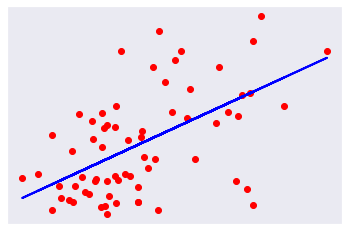

In [6]:
# Importing diabetes dataset
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = load_diabetes()

# Use only one feature -- the following code creates a 1-dimensional 
# array containing just the second feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_data = diabetes_X[:,:,2]

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test , diabetes_y_train, diabetes_y_test = train_test_split(
                                     diabetes_X_data, diabetes.target, test_size = 0.15 )


# Create linear regression object
m1 = LinearRegression()


# Train the model with training data 
m1.fit(diabetes_X_train, diabetes_y_train)

# Make predictions on test data 
diabetes_y_pred = m1.predict(diabetes_X_test)

#print the coefficient 
print('Coefficients: \n', m1.coef_)

#print the mean squared error
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))


# print the r-squared
print('R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot 
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


As you can see, the prediction is not very good. Maybe we can try something different!

#### Exercise 3.1 ( 15 pts)

Run the linear regression on diabetes data with **all the features** in the dataset. 
Calculate the mean squared error and compare the two models. Did using all available features improve the performance ?

In [7]:
#Your code goes here
X = diabetes.data
Y = diabetes.target
X.shape, Y.shape

((442, 10), (442,))

**Splitting the data into training/testing sets**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

**Data dimension**

In [9]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((375, 10), (375,), (67, 10), (67,))

**Creating linear regression object**

In [10]:
m2 = LinearRegression()

**Training the model with training data**

In [11]:
m2.fit(X_train, Y_train)

LinearRegression()

**Make predictions on test data**

In [12]:
Y_pred = m2.predict(X_test)

### Prediction results ###

**Print the coefficient**

In [13]:
print('Coefficients: \n', m2.coef_)

Coefficients: 
 [ -43.23284921 -237.42063948  498.59106427  291.25380425 -870.416702
  606.74529534   50.51141192   24.7980083   873.18170792   77.72217657]


**Print the mean squared error**

In [14]:
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))


Mean squared error: 3340.47


**Print the r-squared**

In [15]:
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))

R-squared: 0.45


In [16]:
X_test.shape, Y_test.shape, Y_pred.shape

((67, 10), (67,), (67,))

**Plot**

Text(0, 0.5, 'predicted data')

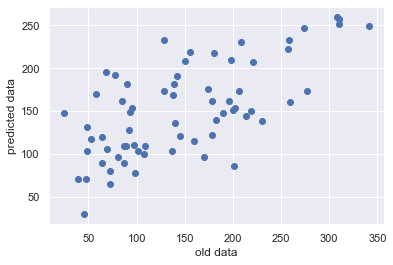

In [17]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('old data')
plt.ylabel('predicted data')

***CONCLUSION***

-The smaller the mean squared error, the closer you are to finding the line of best fit.

==>Performance improved using all the features as compared to using single feature as mean square error decreased.
___________________________________________________________________________________________________________________________

Feature selection allows your estimator to perform a better job by decreasing the model complexity and overfitting.
scikit-learn provides several feature selection methods such as `SelectKBest` and `RFE`. Here is an example of using `RFE` or [Recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) on diabetes dataset:

In [18]:
from sklearn.feature_selection import RFE

# Note that this piece of code works with training data and model from Exercise 3.1
# Either choose the same name for your variables or change the variable names below

rfe = RFE(estimator = m2 , n_features_to_select = 2 , step = 1)
fit_rfe = rfe.fit(X_train, Y_train)
print(fit_rfe.ranking_)

[7 5 1 4 2 3 8 9 1 6]


#### Exercise 3.2 (20 pts)

Calculate and print the mean squared error using two features. Which model performs better? (the more complex one with all features, or the simpler model using fewer features)
(Note that `RFE` has a predict function you can use)



**Using RFE predict**

In [19]:
# Your code goes here 
Y_pred = fit_rfe.predict(X_test)

In [20]:
Y_pred.shape, Y_test.shape

((67,), (67,))

**Prediction results**

In [21]:
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))

print('R-squared: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 3643.24
R-squared: 0.40


**Conclusion**

The model using the selected 2 features did not perform better than the model using all the features.

### Linear regression on the Boston house price dataset

Now it's your turn to perform a linear regression on the Boston housing dataset.

#### Exercise 3.3 ( 20 pts)

Train a set of linear regression models to predict the house prices for boston house dataset. You should use all the available features and train multiple linear regression models for:

* a) 30% training, 70% testing 
* b) 50% training, 50% testing
* c) 70% training, 30% testing
* d) 80% training, 20% testing

Plot the mean squared error for all models. 

**Loading dataset**

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()

df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

**Training multiple linear regression models for the given train-test split**

In [23]:
test_size_array = [0.70, 0.50, 0.30, 0.20]
mean_squared_error1 = []
for index in test_size_array:
    bxt , bxtest, byt, bytest = train_test_split(df_x, df_y, test_size = index, random_state = 42)
    m4 = LinearRegression()
    m4.fit(bxt, byt)
    y_pred = m4.predict(bxtest)
    MSE = np.square(np.subtract(bytest,y_pred)).mean()
    mean_squared_error1.append(round(MSE[0],2))    
    
print(mean_squared_error1)

[25.69, 25.18, 21.52, 24.29]


**Plotting the mean squared error for all models**

Text(0.5, 1.0, 'Mean squared error for all models')

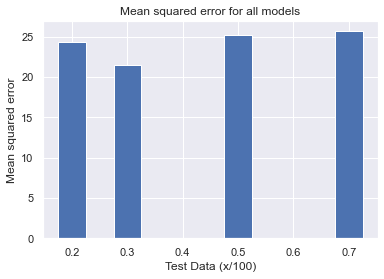

In [24]:
plt.bar(test_size_array, mean_squared_error1, width = 0.05)
plt.xlabel("Test Data (x/100)")
plt.ylabel("Mean squared error")
plt.title("Mean squared error for all models")

 #### Exercise 3.4  ( 45 pts)
 
Use `RFE` to find the best set of features for prediction. What are they? 
(Note that in order to find the best set of features for prediction, you need to consider all possible combinations, from 1 to d features, calculate the MSE for each one and pick the set of features that give you the min MSE)


Use the same train-test splits from 3.3, to train new models with the best set of features for prediction. Plot the mean squared error for each linear regression models and given train-test split.

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()

df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

**Splitting our test data and training data in 20% and 80% of our whole dataset**

In [26]:
bxt , bxtest, byt, bytest = train_test_split(df_x, df_y, test_size = 0.20, random_state = 42 )
m5 = LinearRegression()
m5.fit(bxt, byt)

LinearRegression()

In [27]:
print(df_x.shape)
print(df_y.shape)

(506, 13)
(506, 1)


**Using RFE to find the best set of features for prediction, considering all possible combinations, from 1 to 13 features**

In [28]:
mean_squared_error = {}
MIN = 1
for index in range(1,14):
    rfe = RFE(estimator = m5 , n_features_to_select = index , step = 1)
    fit_rfe = rfe.fit(bxt, byt)
    Y_pred = fit_rfe.predict(bxtest)
    MSE = np.square(np.subtract(bytest,Y_pred)).mean()
    mean_squared_error[index] = round(MSE[0],2)
    print(f'MSE, when number of feature is {index}: {round(MSE[0],2)}')
    
print('\n')
print('No. of features and mean_squared_error: ')
print(mean_squared_error ,'\n')

print('Number of best set of features ',min(mean_squared_error, key=mean_squared_error.get))

#to find the min mean_squared_error
n_features_to_select = min(mean_squared_error, key=mean_squared_error.get)

MSE, when number of feature is 1: 58.29
MSE, when number of feature is 2: 40.06
MSE, when number of feature is 3: 39.57
MSE, when number of feature is 4: 33.9
MSE, when number of feature is 5: 33.5
MSE, when number of feature is 6: 24.97
MSE, when number of feature is 7: 26.06
MSE, when number of feature is 8: 24.98
MSE, when number of feature is 9: 24.7
MSE, when number of feature is 10: 23.8
MSE, when number of feature is 11: 25.32
MSE, when number of feature is 12: 24.18
MSE, when number of feature is 13: 24.29


No. of features and mean_squared_error: 
{1: 58.29, 2: 40.06, 3: 39.57, 4: 33.9, 5: 33.5, 6: 24.97, 7: 26.06, 8: 24.98, 9: 24.7, 10: 23.8, 11: 25.32, 12: 24.18, 13: 24.29} 

Number of best set of features  10


**Plotting Mean Squared Error(MSE) on the graph**

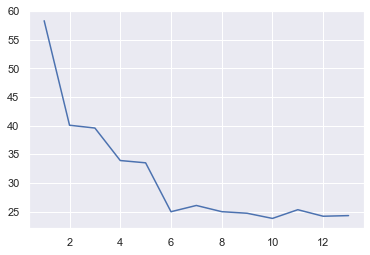

In [29]:
plt.plot(*zip(*sorted(mean_squared_error.items())))

**Selecting the best set of features for prediction that gave the min MSE**

In [30]:
rfe = RFE(estimator = m5 , n_features_to_select = n_features_to_select , step = 1)
fit_rfe = rfe.fit(bxt, byt)
selected_features = fit_rfe.transform(df_x)

**Listing the best set of features for prediction using RFE**

In [31]:
ranking_array = fit_rfe.ranking_
print('Ranking of the feature: ', ranking_array)
print('\n')

features = boston.feature_names
print('Original feature List: \n',features)
print('\n')

print('Best set of features for prediction using RFE:\n ')

for index in range(13):
    if ranking_array[index]==1:
        print(features[index])

Ranking of the feature:  [1 1 1 1 1 1 4 1 1 3 1 2 1]


Original feature List: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Best set of features for prediction using RFE:
 
CRIM
ZN
INDUS
CHAS
NOX
RM
DIS
RAD
PTRATIO
LSTAT


**Training new models with the best set of features for prediction**

In [32]:
test_size_array = [0.70, 0.50, 0.30, 0.20]
mean_squared_error1 = []
for index in test_size_array:
    bxt , bxtest, byt, bytest = train_test_split(selected_features, df_y, test_size = index, random_state = 42)
    m4 = LinearRegression()
    m4.fit(bxt, byt)
    y_pred = m4.predict(bxtest)
    MSE = np.square(np.subtract(bytest,y_pred)).mean()
    mean_squared_error1.append(round(MSE[0],2))    
    
print(mean_squared_error1)

[25.77, 25.92, 21.93, 23.8]


**Plotting the mean squared error for each linear regression models and given train-test split**

Text(0.5, 1.0, 'Mean squared error for all models')

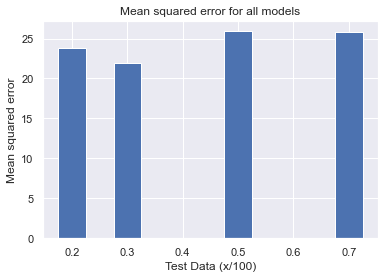

In [33]:
plt.bar(test_size_array, mean_squared_error1, width = 0.05)
plt.xlabel("Test Data (x/100)")
plt.ylabel("Mean squared error")
plt.title("Mean squared error for all models")